In [1]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd
from nltk.corpus import stopwords
import string
import numpy as np
import nltk
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.cross_validation import train_test_split
from nltk.classify.scikitlearn import SklearnClassifier
import unicodedata 
from sklearn.feature_selection.univariate_selection import SelectKBest, chi2

from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud 
from nltk.corpus import stopwords


C:\Users\mohamede\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#import data 

df = pd.read_csv("train.tsv",sep='\t' , encoding='utf-8' )
df_test =  pd.read_csv("test.tsv",sep='\t' , encoding='utf-8' )
df.drop(["PhraseId","SentenceId"],axis=1,inplace=True) # remove useless columns
df_test.drop(["PhraseId","SentenceId"],axis=1,inplace=True) # remove useless columns
df.head()
df.shape

(10000, 2)

In [3]:
df.Sentiment.unique()

array([1, 2, 3, 4, 0], dtype=int64)

In [4]:
df.head()

,Phrase,Sentiment
0,A series of escapades demonstrating the adage ...,1
1,A series of escapades demonstrating the adage ...,2
2,A series,2
3,A,2
4,series,2


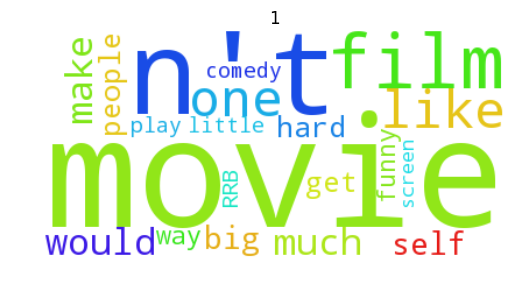

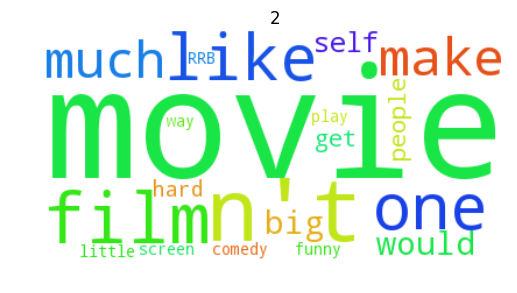

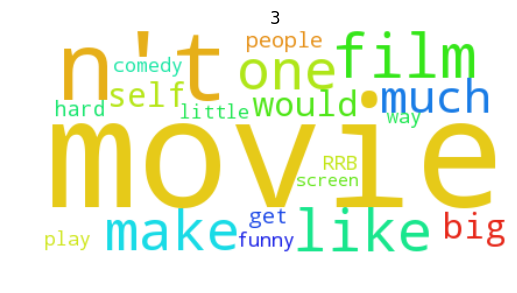

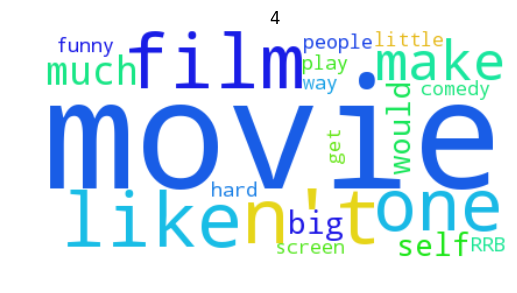

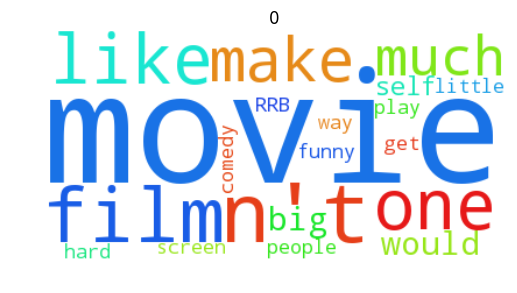

In [5]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
range = [1,2,3,4,0]
cloud = WordCloud(background_color="white", max_words=20, stopwords=stopwords.words('english'))
for i in range: 
    positive_cloud = cloud.generate(df.loc[df.Sentiment == 1, 'Phrase'].str.cat(sep='\n'))
    plt.figure()
    plt.imshow(positive_cloud)
    plt.axis("off")
    plt.title(i)
    plt.show()

 1) Remove punctuation marks and transform all characters to lowercase using nlk library 2) Remove stop words 3) Steaming

Sans oublier la segmentation afin de separer chaque phrase en mot l idée c que chaque mot dans une phrase va être consideré comme étant un feature
and finally tfidf

In [6]:
#stop words
stop = stopwords.words('english')
stop.extend(['will','now','today','movie','serie','series','story','film'])

# remove punctionation
stemmer = PorterStemmer()
def remove_punctuation(s):
    s = ''.join([i for i in s if i not in set(string.punctuation)])
    return s

df['Phrase'] = df['Phrase'].apply(remove_punctuation)
#stemming
def stem_tokens(tokens, stemmer):
    stemmed = []
    for item in tokens:
        stemmed.append(stemmer.stem(item))
    return stemmed

def tokenize(text):
    tokens = nltk.word_tokenize(text)
    stems = stem_tokens(tokens, stemmer)
    return stems


In [7]:
#df['Phrase'] = df['Phrase'].apply(tokenize)

In [8]:
#df['Phrase'] = df['Phrase'].apply(lambda x: [item for item in x if item not in stop])

In [9]:
#delete empty rows

#df['Phrase'] = df[df.Phrase.map(lambda x: len(x) if isinstance(x, list) else None) != 0]
#df = df.dropna()

In [10]:
#transform a list to one string

#df['Phrase'] = df.Phrase.map(lambda x: ' '.join(x))

In [11]:
#remove duplicates rows because after pre-processing we get same occurences

#df = df.drop_duplicates()

In [12]:
# we can improve it with changing parameters and add other parametrs 
# for example ngrams 
# max_df , min_df  and max_feature
vect = TfidfVectorizer(min_df=5,sublinear_tf=True, analyzer='word', stop_words=stop, tokenizer=tokenize , strip_accents = 'ascii',  max_df = 0.8 ,ngram_range = (1,2))

In [13]:
X = vect.fit_transform(df.pop('Phrase'))

In [14]:
#sparse matrix to datframe here i used a loop because the memory of my computer does not suppert #to transfor matrix to dataframe en un seul coup that why it take time 
for i, col in enumerate(vect.get_feature_names()):
    df[col] = pd.SparseSeries(X[:, i].toarray().reshape(-1,), fill_value=0)

In [15]:
#df

In [16]:
for i, col in enumerate(vect.get_feature_names()):
    df_test[col] = pd.SparseSeries(X[:, i].toarray().reshape(-1,), fill_value=0)

In [17]:
#test if there are any NaN
print(df.isnull().values.sum().sum())


0


In [18]:
#df.isnull().values.any()

In [19]:
label = df.Sentiment
train= df.drop('Sentiment', axis=1)

In [24]:
#with k = 5000 the number of feature ( not sure if it correct or not)
X_new = SelectKBest(chi2, k=4000).fit_transform(train, label)


In [25]:
df.head()

,Sentiment,10,10 minut,100,100 minut,10thgrade,10thgrade learn,1915,1950,1950 60,...,young,young actress,young ballesta,young fit,young romant,youth,youth remain,zaza,zinger,zip
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [27]:
#validation for svm
#there are an error to check it ( grid search ne marche pas i will check why after)
label = df.Sentiment
train= df.drop('Sentiment', axis=1)


from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()),
                      ('clf', LinearSVC()),
 ])
from sklearn.model_selection import GridSearchCV
 





In [3]:
df.head()

NameError: name 'df' is not defined

In [2]:
label = df['Sentiment'].values
train= df.drop('Sentiment', axis=1)
classif = SklearnClassifier(LinearSVC())
# Séparation du set de train et de test
X_train,X_test,y_train,y_test = train_test_split(train.as_matrix(),label, test_size = 0.33)



NameError: name 'df' is not defined

In [58]:
from sklearn import svm
from sklearn.cross_validation import train_test_split
#X_train, X_val, y_train, y_val = train_test_split(tfidf, df["Sentiment"], test_size=0.4, random_state=2)

clf = svm.SVC(decision_function_shape='ovo',kernel='linear')
#clf = svm.LinearSVC()
#clf.kernel='polynomial'
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#dec = clf.decision_function([[1]])
#dec.shape[1] # 4 classes: 4*3/2 = 6

#grid search to find the best parameters

good = 0
print(len(y_test))
ln=len(y_test)
for i in y_test:
    if(y_test[i] == y_pred[i]):
        good= good+1
print("Linear SVM accuracy:", good*100/len(y_test))


In [59]:
good = 0
print(len(y_test))
ln=len(y_test)
for i in y_test:
    if(y_test[i] == y_pred[i]):
        good= good+1
print("Linear SVM accuracy:", good*100/len(y_test))

#pd.SparseDataFrame(X.todense(), columns=vect.get_feature_names(), index=df.index) 

3300
accuracy: 61.03030303030303


In [60]:
#X = vect.fit_transform(df.pop('Phrase'))
#X = vect.fit_transform(df.pop('Phrase')).toarray()

#for i, col in enumerate(vect.get_feature_names()):
    #df[col] = X[:, i]
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
clf = RandomForestClassifier(n_estimators=100)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)    

In [61]:
good = 0
print(len(y_test))
ln=len(y_test)
for i in y_test:
    if(y_test[i] == y_pred[i]):
        good= good+1
print("RF accuracy:", good*100/len(y_test))


3300
accuracy: 61.03030303030303


In [ ]:
from sklearn.naive_bayes import MultinomialNB
gnb = MultinomialNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test)

In [ ]:
good = 0
print(len(y_test))
ln=len(y_test)
for i in y_test:
    if(y_test[i] == y_pred[i]):
        good= good+1
print("MultinomialNB accuracy:", good*100/len(y_test))

In [1]:
#d.head()
from sklearn.naive_bayes import BernoulliNB
gnb = BernoulliNB(10)
y_pred = gnb.fit(X_train, y_train).predict(X_test)

NameError: name 'X_train' is not defined

In [69]:
good = 0
print(len(y_test))
ln=len(y_test)
for i in y_test:
    if(y_test[i] == y_pred[i]):
        good= good+1
print("BernoulliNB accuracy:", good*100/len(y_test))

3300
accuracy: 77.3030303030303
